Package Imports

In [ ]:
import pandas as pd
import numpy as np

Data Loading

In [ ]:
#Mounting the drive
# Mount our Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
myfile = "/content/drive/MyDrive/datasets/sales_predictions - sales_predictions.csv"
df = pd.read_csv(myfile)
df.head()
df2= df.copy()

1) How many rows and columns?



In [ ]:
df.shape

(8523, 12)

In [ ]:
print(f"The number or rows is {df.shape[0]}")
print(f'The number of columns is {df.shape[1]}')

The number or rows is 8523
The number of columns is 12


2) What are the datatypes of each variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [ ]:
df.duplicated().value_counts()

False    8523
dtype: int64

4) Identify missing values.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [ ]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Item_weight and Outlet_size are the missing values,for Item wieght we can fill in missing values using the average, for the Outlet size we can drop the rows or assume that it's a medium package since that's the most occured category

6) Confirm that there are no missing values after addressing them.

In [ ]:
df["Item_Weight"].fillna(value = df["Item_Weight"].mean(),inplace=True)
df["Item_Weight"].isna().value_counts()

False    8523
Name: Item_Weight, dtype: int64

In [ ]:
df["Outlet_Size"].fillna(value ='Medium',inplace=True)
df["Outlet_Size"].isna().value_counts()


False    8523
Name: Outlet_Size, dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)

In [ ]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace({"Low Fat" : "Low Fat" , "LF":"Low Fat" , "low fat" : "Low Fat" , "Regular" : "Regular Fat" , "reg" : "Regular Fat" },inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
num = ['int16','int32','int64','float16','float32','float64']
num_df = df.select_dtypes(include=num)
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df[["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]].describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.226124,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,9.310000,0.026989,93.826500,834.247400
50%,12.857645,0.053931,143.012800,1794.331000
75%,16.000000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


***PART 3 ***



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Histogram to view the distributions of various features in your dataset.


<Axes: xlabel='Item_Weight', ylabel='Count'>

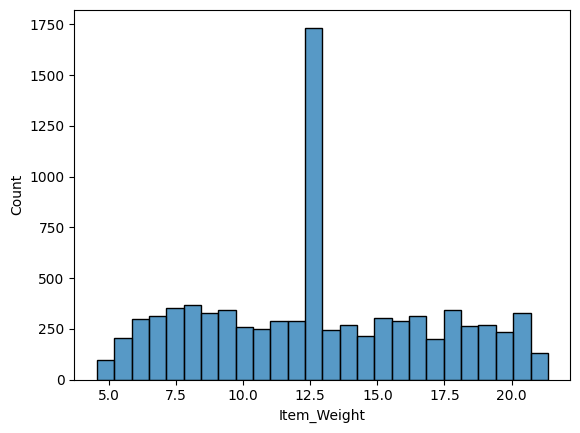

In [ ]:
sns.histplot(data=df , x = "Item_Weight" , y=None , bins = "auto")


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

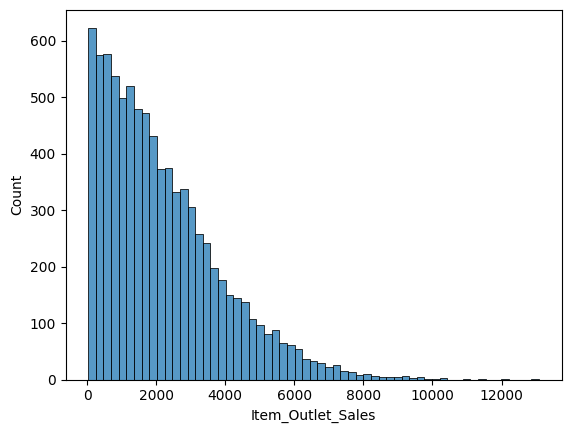

In [ ]:
sns.histplot(data=df, x="Item_Outlet_Sales" , y=None , hue=None , bins="auto" , stat='count')

Boxplot to view statistical summaries of various features in your dataset.


<Axes: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

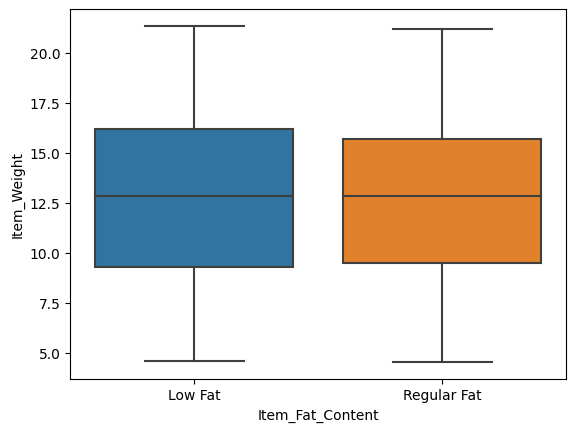

In [ ]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

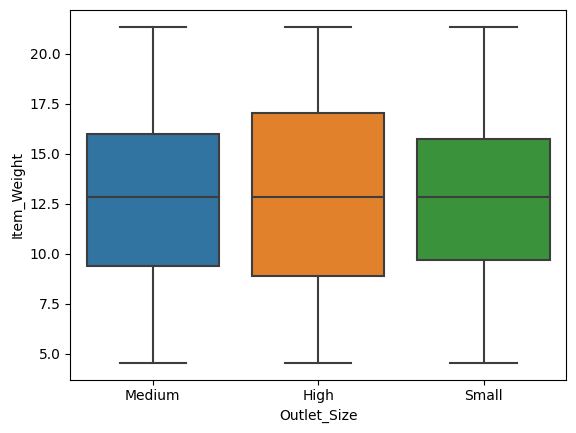

In [ ]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Weight')

Heatmap of the correlation between features.


In [ ]:
correlation = num_df.corr()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

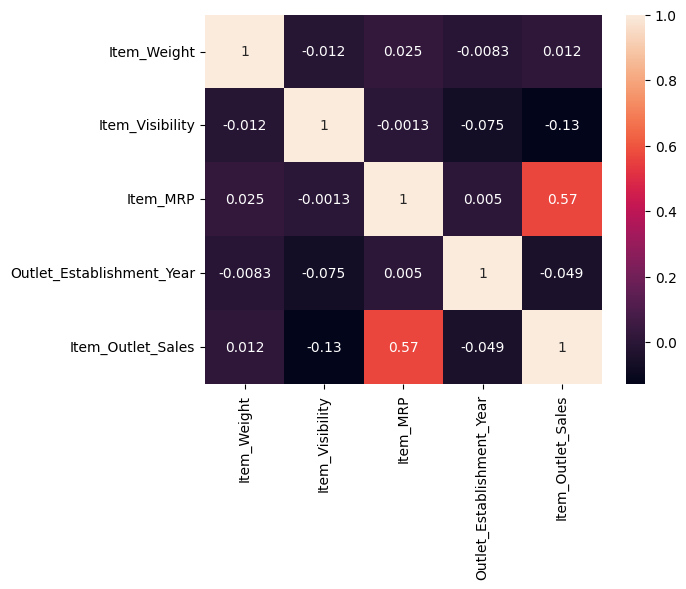

In [ ]:
sns.heatmap(correlation , annot=True)

**Project 4**

Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).


In [ ]:
df2 = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().round(2)
df2.head()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Baking Goods'),
  Text(1, 0, 'Breads'),
  Text(2, 0, 'Breakfast'),
  Text(3, 0, 'Canned'),
  Text(4, 0, 'Dairy'),
  Text(5, 0, 'Frozen Foods'),
  Text(6, 0, 'Fruits and Vegetables'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Health and Hygiene'),
  Text(9, 0, 'Household'),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Others'),
  Text(12, 0, 'Seafood'),
  Text(13, 0, 'Snack Foods'),
  Text(14, 0, 'Soft Drinks'),
  Text(15, 0, 'Starchy Foods')])

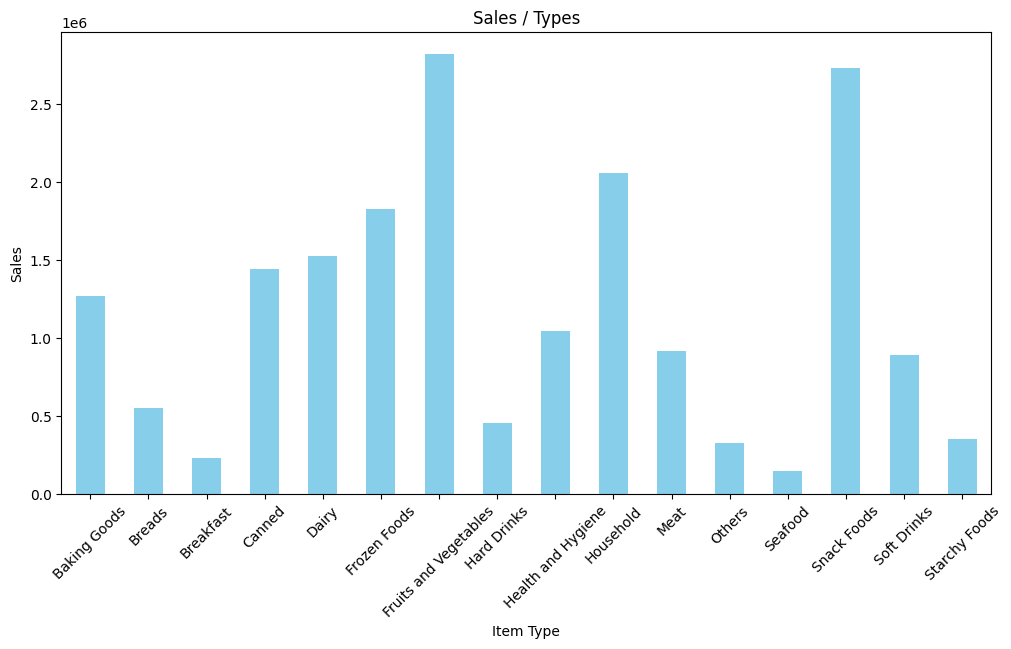

In [ ]:
plt.figure(figsize=(12, 6))
df2.plot(kind='bar', color='skyblue')
plt.title('Sales / Types')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)


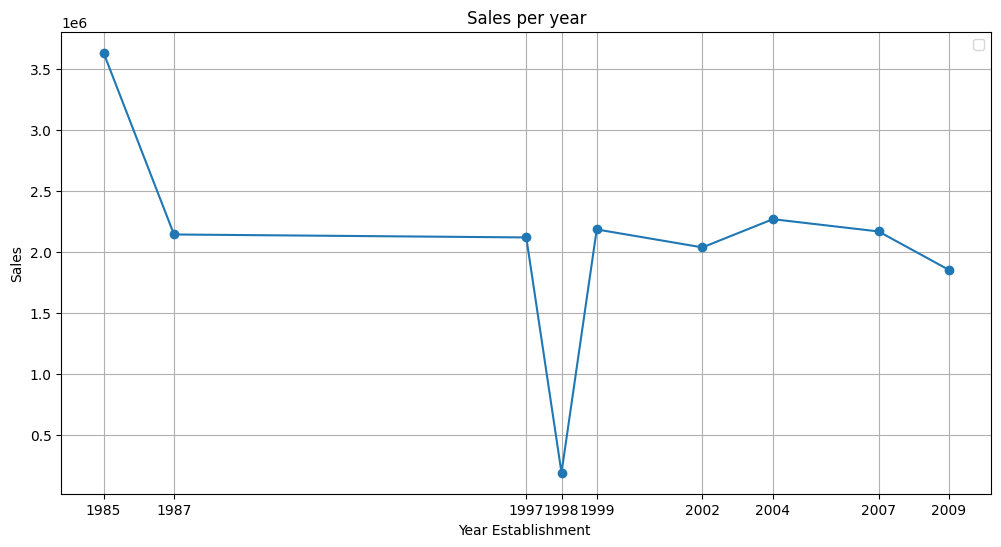

In [ ]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year, marker='o')

plt.title('Sales per year')
plt.xlabel('Year Establishment ')
plt.ylabel('Sales')
plt.xticks(sales_by_year.index)
plt.grid(True)
plt.legend()

PROJECT 5

In [ ]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df2["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df2.replace({"Low Fat" : "Low Fat" , "LF":"Low Fat" , "low fat" : "Low Fat" , "Regular" : "Regular Fat" , "reg" : "Regular Fat" },inplace=True)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
X = df2.drop(columns={"Item_Outlet_Sales"})
y= df2["Item_Outlet_Sales"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

scaler = StandardScaler()
encoder= OneHotEncoder(sparse=False,handle_unknown="ignore")

mean_imputer= SimpleImputer(strategy="mean")
freq_imputer = SimpleImputer(strategy="most_frequent")

num_pipeline = make_pipeline(mean_imputer,scaler)
cat_pipeline = make_pipeline(freq_imputer,encoder)

num_tuple = (num_pipeline,num_selector)
cat_tuple = (cat_pipeline,cat_selector)

transformer = make_column_transformer(num_tuple,cat_tuple,remainder="passthrough")
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe38499bb20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe38499b3d0>)])

In [ ]:
transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe38499bb20>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe38499b3d0>)])